In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("trade_register.csv", skiprows=11)

In [4]:
df.head(10)

,SIPRI AT Database ID,Supplier,Recipient,Designation,Description,Armament category,Order date,Order date is estimate,Numbers delivered,Numbers delivered is estimate,Delivery year,Delivery year is estimate,Status,SIPRI estimate,TIV deal unit,TIV delivery values,Local production;
0,55238,Albania,Burkina Faso,PM-43 120mm,mortar,Artillery,2011,Yes,12,No,2011,No,Second hand,0.25,0.10,1.20,No;
1,60840,Algeria,Western Sahara,BTR-60PB,armoured personnel carrier,Armoured vehicles,2016,Yes,3,Yes,2016,Yes,Second hand,0.25,0.10,0.30,No;
2,33777,Angola,Cote d'Ivoire,BMP-2,infantry fighting vehicle,Armoured vehicles,2002,No,2,Yes,2002,No,Second hand,0.90,0.36,0.72,No;
3,33871,Angola,Cote d'Ivoire,T-55,tank,Armoured vehicles,2002,No,2,No,2002,No,Second hand,1.25,0.50,1.00,No;
4,24488,Argentina,Ecuador,M-101 105mm,towed gun,Artillery,1995,Yes,18,No,1995,No,Second hand but modernized,0.45,0.30,5.35,No;
5,31645,Argentina,Bolivia,M-3 Half-track,armoured personnel carrier,Armoured vehicles,2006,No,37,Yes,2006,No,Second hand,0.15,0.06,2.22,No;
6,32179,Argentina,Uruguay,Pucara,ground-attack aircraft,Aircraft,2000,No,1,No,2000,No,Second hand,5.00,2.00,2.00,No;
7,60797,Argentina,Uruguay,Pucara,ground-attack aircraft,Aircraft,2002,No,1,No,2002,No,Second hand,5.00,2.00,2.00,No;
8,53100,Argentina,Paraguay,M-3 Half-track,armoured personnel carrier,Armoured vehicles,2007,No,20,Yes,2011,Yes,Second hand,0.15,0.06,1.20,No;
9,57015,Armenia,Sudan,An-32,transport aircraft,Aircraft,2005,Yes,1,No,2006,No,Second hand,11.00,4.40,4.40,No;


In [5]:
#deleting empty space
df.columns = df.columns.str.strip()

In [6]:
print(df[["Supplier", "Recipient", "Delivery year"]].head())

    Supplier       Recipient  Delivery year
0    Albania    Burkina Faso           2011
1    Algeria  Western Sahara           2016
2     Angola   Cote d'Ivoire           2002
3     Angola   Cote d'Ivoire           2002
4  Argentina         Ecuador           1995


In [9]:
#Create Kinsella(2003), sociomatrix
def create_kinsella_matrix(df, target_year):
    year_data = df[df["Delivery year"] == target_year].copy()
    year_data["Link"] = 1
    matrix = year_data.pivot_table(index= "Supplier", columns= "Recipient", values = "Link", aggfunc = "max").fillna(0)
    countries = sorted(list(set(matrix.index) | set (matrix.columns)))
    matrix = matrix.reindex(index=countries, columns=countries, fill_value=0)

    np.fill_diagonal(matrix.values, 0)
    return matrix
matrix_2020 = create_kinsella_matrix(df, 2020)
print(matrix_2020)

Recipient             Afghanistan  Albania  Algeria  Angola  Argentina  \
Supplier                                                                 
Afghanistan                   0.0      0.0      0.0     0.0        0.0   
Albania                       0.0      0.0      0.0     0.0        0.0   
Algeria                       0.0      0.0      0.0     0.0        0.0   
Angola                        0.0      0.0      0.0     0.0        0.0   
Argentina                     0.0      0.0      0.0     0.0        0.0   
...                           ...      ...      ...     ...        ...   
Viet Nam                      0.0      0.0      0.0     0.0        0.0   
Zambia                        0.0      0.0      0.0     0.0        0.0   
eSwatini                      0.0      0.0      0.0     0.0        0.0   
unknown recipient(s)          0.0      0.0      0.0     0.0        0.0   
unknown supplier(s)           0.0      0.0      0.0     0.0        0.0   

Recipient             Australia  Aust

In [13]:
relations = matrix_2020.stack()
transfers = relations[relations == 1]
print(transfers.head(30))

Supplier   Recipient     
Australia  Canada            1.0
           Chile             1.0
           Fiji              1.0
           Tonga             1.0
           United States     1.0
Austria    Czechia           1.0
           France            1.0
           Myanmar           1.0
           Thailand          1.0
Belarus    Uganda            1.0
           Viet Nam          1.0
Belgium    Indonesia         1.0
           Saudi Arabia      1.0
Brazil     Chile             1.0
           France            1.0
           Indonesia         1.0
           Philippines       1.0
Bulgaria   Cote d'Ivoire     1.0
Canada     Brazil            1.0
           Chile             1.0
           Philippines       1.0
           Saudi Arabia      1.0
           Senegal           1.0
           Turkiye           1.0
           UAE               1.0
           United Kingdom    1.0
           Uruguay           1.0
China      Algeria           1.0
           Angola            1.0
           Bangla

In [16]:
analysis_result = []
for year in range (1995, 20205):
    year_data =df[df["Delivery year"] == year]
    if not year_data.empty:
        countries = set(year_data["Supplier"].unique()) | set(year_data["Recipient"].unique())
        g = len(countries)
        connections = set(zip(year_data["Supplier"], year_data["Recipient"]))
        connections = { (s, r) for s, r in connections if s != r }
        L = len(connections)

        density = L / (g * (g -1))
        analysis_result.append({ "Year" : year, "Countries_counts": g, "Connections_counts": L, "Density": density})
result_df = pd.DataFrame(analysis_result)
print(result_df)
        

    Year  Countries_counts  Connections_counts   Density
0   1995               114                 322  0.024996
1   1996               111                 320  0.026208
2   1997               110                 332  0.027690
3   1998               115                 317  0.024180
4   1999               115                 332  0.025324
5   2000               119                 317  0.022575
6   2001               110                 325  0.027106
7   2002               115                 330  0.025172
8   2003               104                 298  0.027819
9   2004               112                 328  0.026384
10  2005               118                 337  0.024410
11  2006               122                 373  0.025268
12  2007               119                 366  0.026065
13  2008               117                 371  0.027336
14  2009               125                 412  0.026581
15  2010               127                 431  0.026934
16  2011               128     

--- Turkey's Suppliers in Key Years ---
Year 2000: 8 Suppliers -> [China,France,Germany,Italy,Netherlands,Switzerland,United Kingdom,United States]
Year 2012: 9 Suppliers -> [Canada,China,Denmark,Germany,Israel,Italy,Netherlands,South Korea,United States]
Year 2024: 4 Suppliers -> [Germany,Italy,Pakistan,United States]


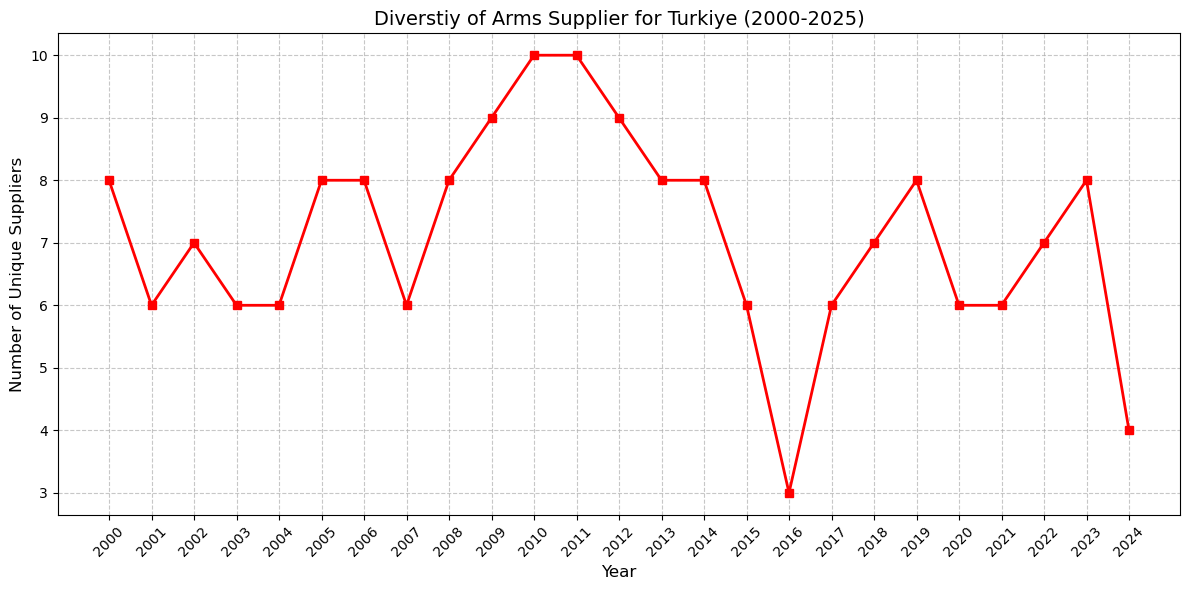

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

target_country = "Turkiye"
turkiye_data = df[df["Recipient"] == target_country].copy()
supplier_counts = []
years = range (2000, 2025)

for year in years:
    year_df = turkiye_data[turkiye_data["Delivery year"] == year]
    unique_suppliers = year_df["Supplier"].unique()
    count = len(unique_suppliers)

    supplier_counts.append({
        "Year" :year,
        "Supplier_Count": count,
        "Suppliers": ",".join(sorted(unique_suppliers))
    })

turkiye_analysis_df = pd.DataFrame(supplier_counts)
#plotting the trend of Turkiye's supplier diversty (Indegree Centrality)
plt.figure(figsize=(12, 6))
plt.plot(turkiye_analysis_df["Year"], turkiye_analysis_df["Supplier_Count"], marker ="s", color="red", linestyle= "-", linewidth=2)
plt.title(f"Diverstiy of Arms Supplier for {target_country} (2000-2025)", fontsize = 14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Unique Suppliers", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(years, rotation =45)
plt.tight_layout()
plt.savefig('turkiye_supplier_trend.png')

# Extract specific lists for 2000, 2012, and 2024
key_years = [2000, 2012, 2024]
key_year_results = turkiye_analysis_df[turkiye_analysis_df['Year'].isin(key_years)]

print("--- Turkey's Suppliers in Key Years ---")
for index, row in key_year_results.iterrows():
    print(f"Year {row['Year']}: {row['Supplier_Count']} Suppliers -> [{row['Suppliers']}]")

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances

/opt/anaconda3/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


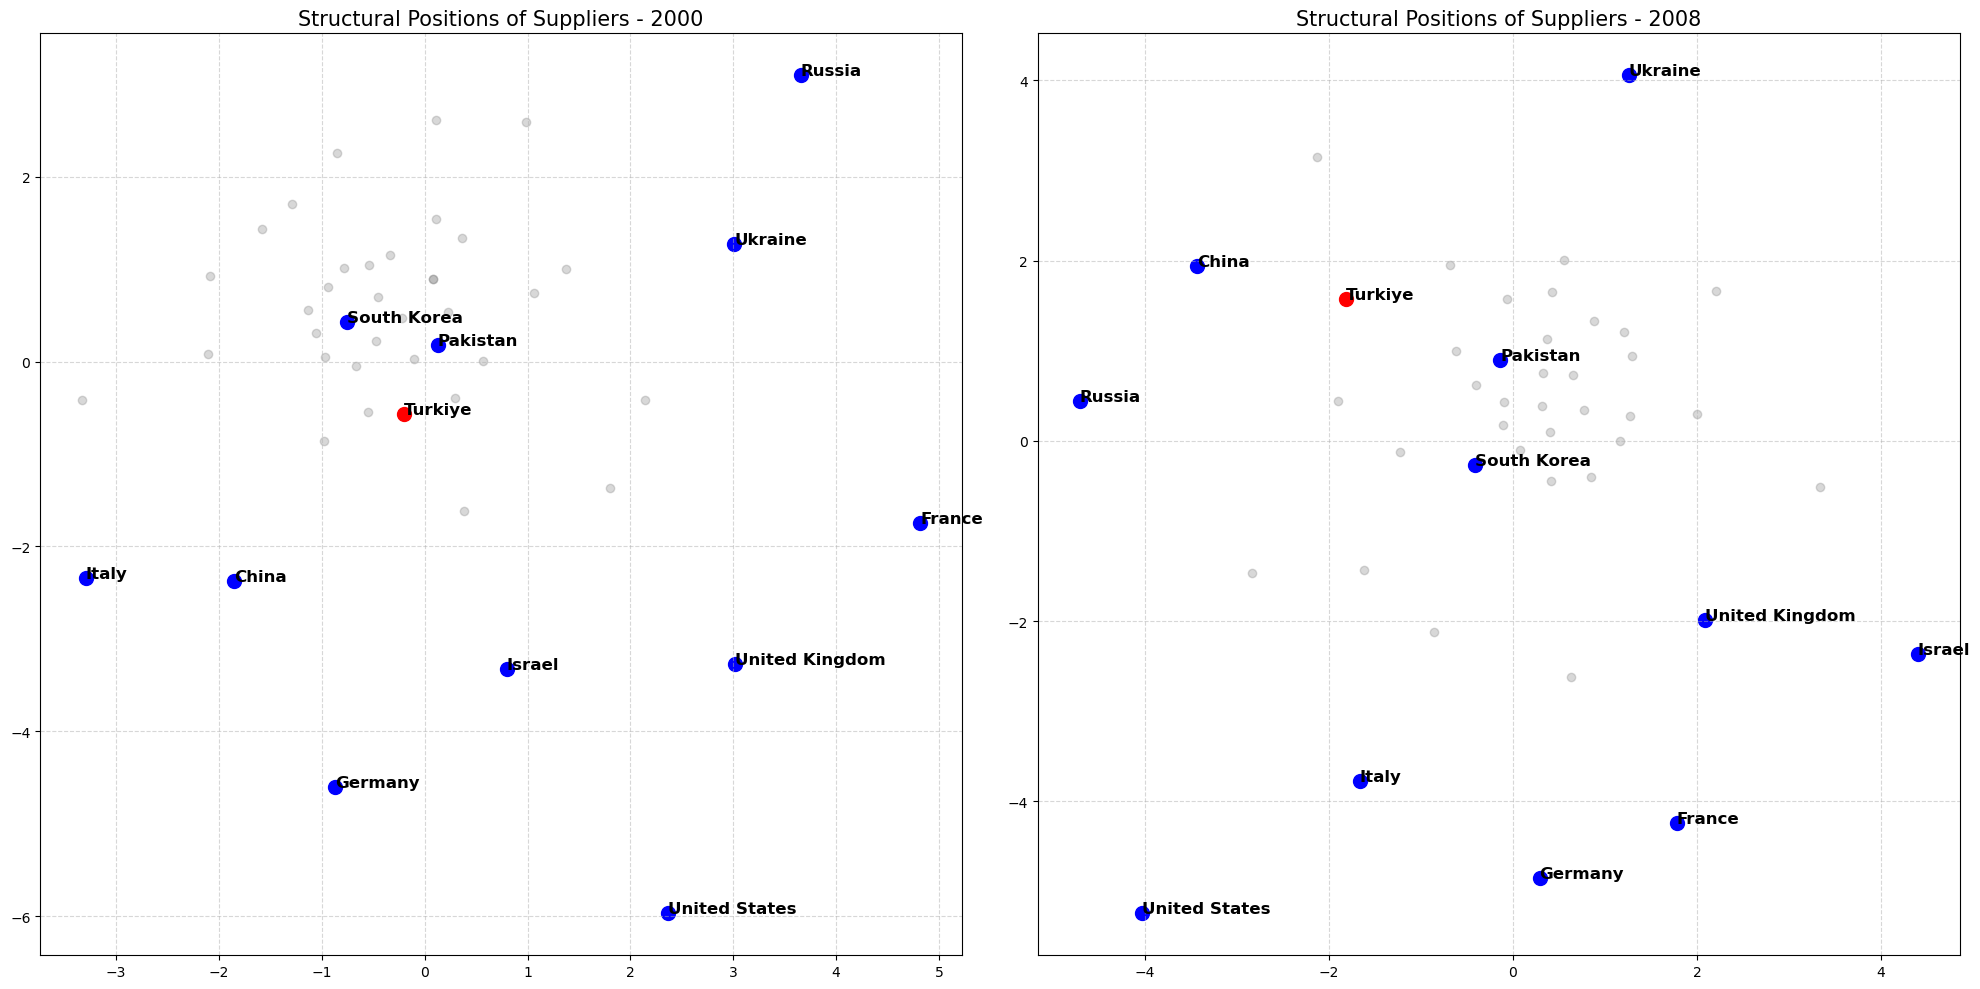

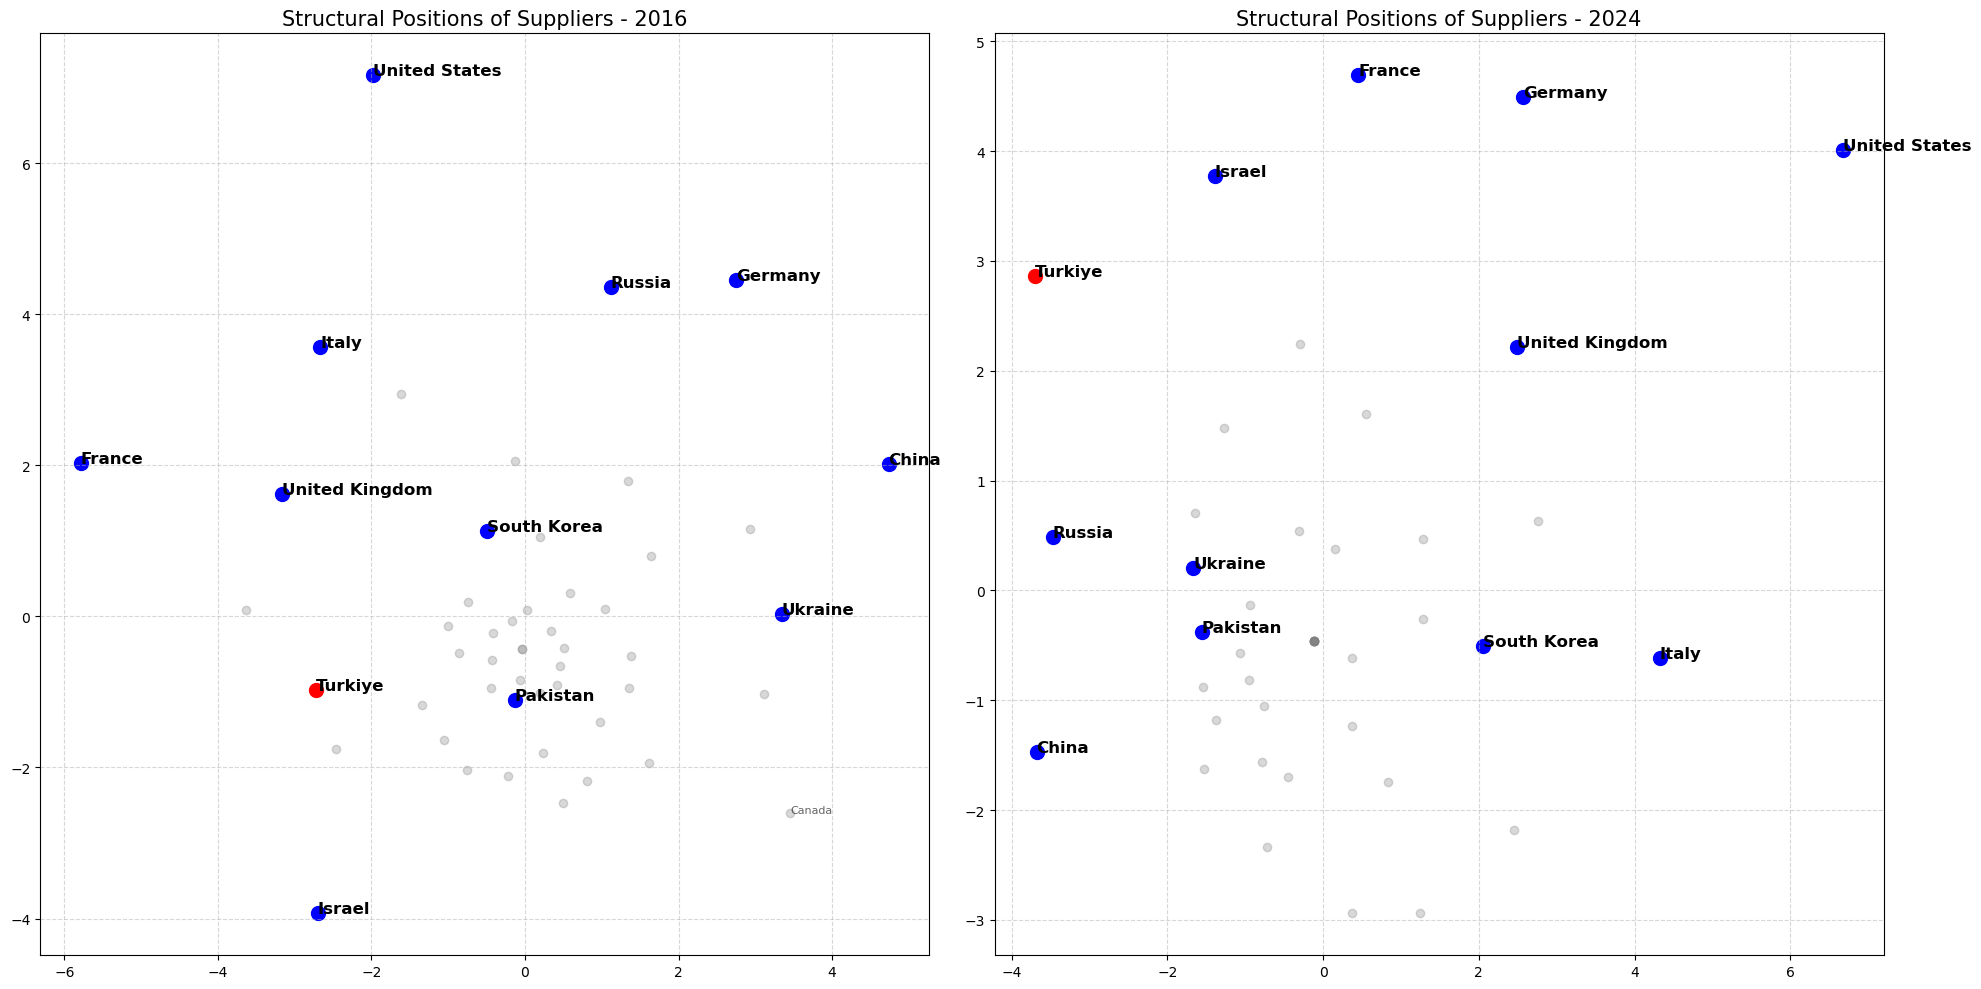

In [30]:
#1. Turkiye Import Analysis (Outdegree)
def plot_mds_comparison(df, years_to_plot, target_labels):
    fig, axes = plt.subplots(1, len(years_to_plot), figsize=(20, 10))
    
    for idx, year in enumerate(years_to_plot):
        # Filter data for the year
        year_data = df[df['Delivery year'] == year].copy()
        year_data['Link'] = 1
        
        # Create Binary Adjacency Matrix
        # Rows = Suppliers, Columns = Recipients
        matrix = year_data.pivot_table(index='Supplier', columns='Recipient', values='Link', aggfunc='max').fillna(0)
        
        # Compute Euclidean Distance between Suppliers (Structural Equivalence)
        # d_ij = sqrt(sum(x_ik - x_jk)^2)
        dist_matrix = euclidean_distances(matrix)
        
        # Apply MDS
        mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42, normalized_stress='auto')
        coords = mds.fit_transform(dist_matrix)
        
        # Plotting
        ax = axes[idx]
        ax.scatter(coords[:, 0], coords[:, 1], alpha=0.3, c='gray')
        
        # Highlight and label specific countries
        suppliers = matrix.index.tolist()
        for i, country in enumerate(suppliers):
            if country in target_labels:
                color = 'red' if country == 'Turkiye' else 'blue'
                ax.scatter(coords[i, 0], coords[i, 1], c=color, s=100)
                ax.annotate(country, (coords[i, 0], coords[i, 1]), fontsize=12, fontweight='bold')
            elif (coords[i,0]**2 + coords[i,1]**2) > np.percentile(coords[:,0]**2 + coords[:,1]**2, 85):
                # Label outliers/major players even if not in target list
                ax.annotate(country, (coords[i, 0], coords[i, 1]), fontsize=8, alpha=0.6)

        ax.set_title(f"Structural Positions of Suppliers - {year}", fontsize=15)
        ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.savefig('mds_comparison_2000_2024.png')

# Define countries to highlight for comparison
highlights = ['United States', "United Kingdom", "Italy", 'Russia', 'China', 'Germany', 'France', 'Turkiye', 'Israel', 'South Korea', 'Pakistan', 'Ukraine']

# Run the plotting
plot_mds_comparison(df, [2000, 2008], highlights)
plot_mds_comparison(df, [2016, 2024], highlights)

--- Turkiye Export Evolution ---
 Year  Destination_Count                                                                                                                                                                                                                          Destinations
 2000                  2                                                                                                                                                                                                                       Azerbaijan, UAE
 2024                 25 Albania, Azerbaijan, Bangladesh, Burkina Faso, Chad, DR Congo, Ecuador, Ethiopia, Georgia, Hungary, Indonesia, Iraq, Kazakhstan, Kenya, Libya, Maldives, Mali, Morocco, Nigeria, Pakistan, Philippines, Poland, Romania, UAE, Ukraine


/opt/anaconda3/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


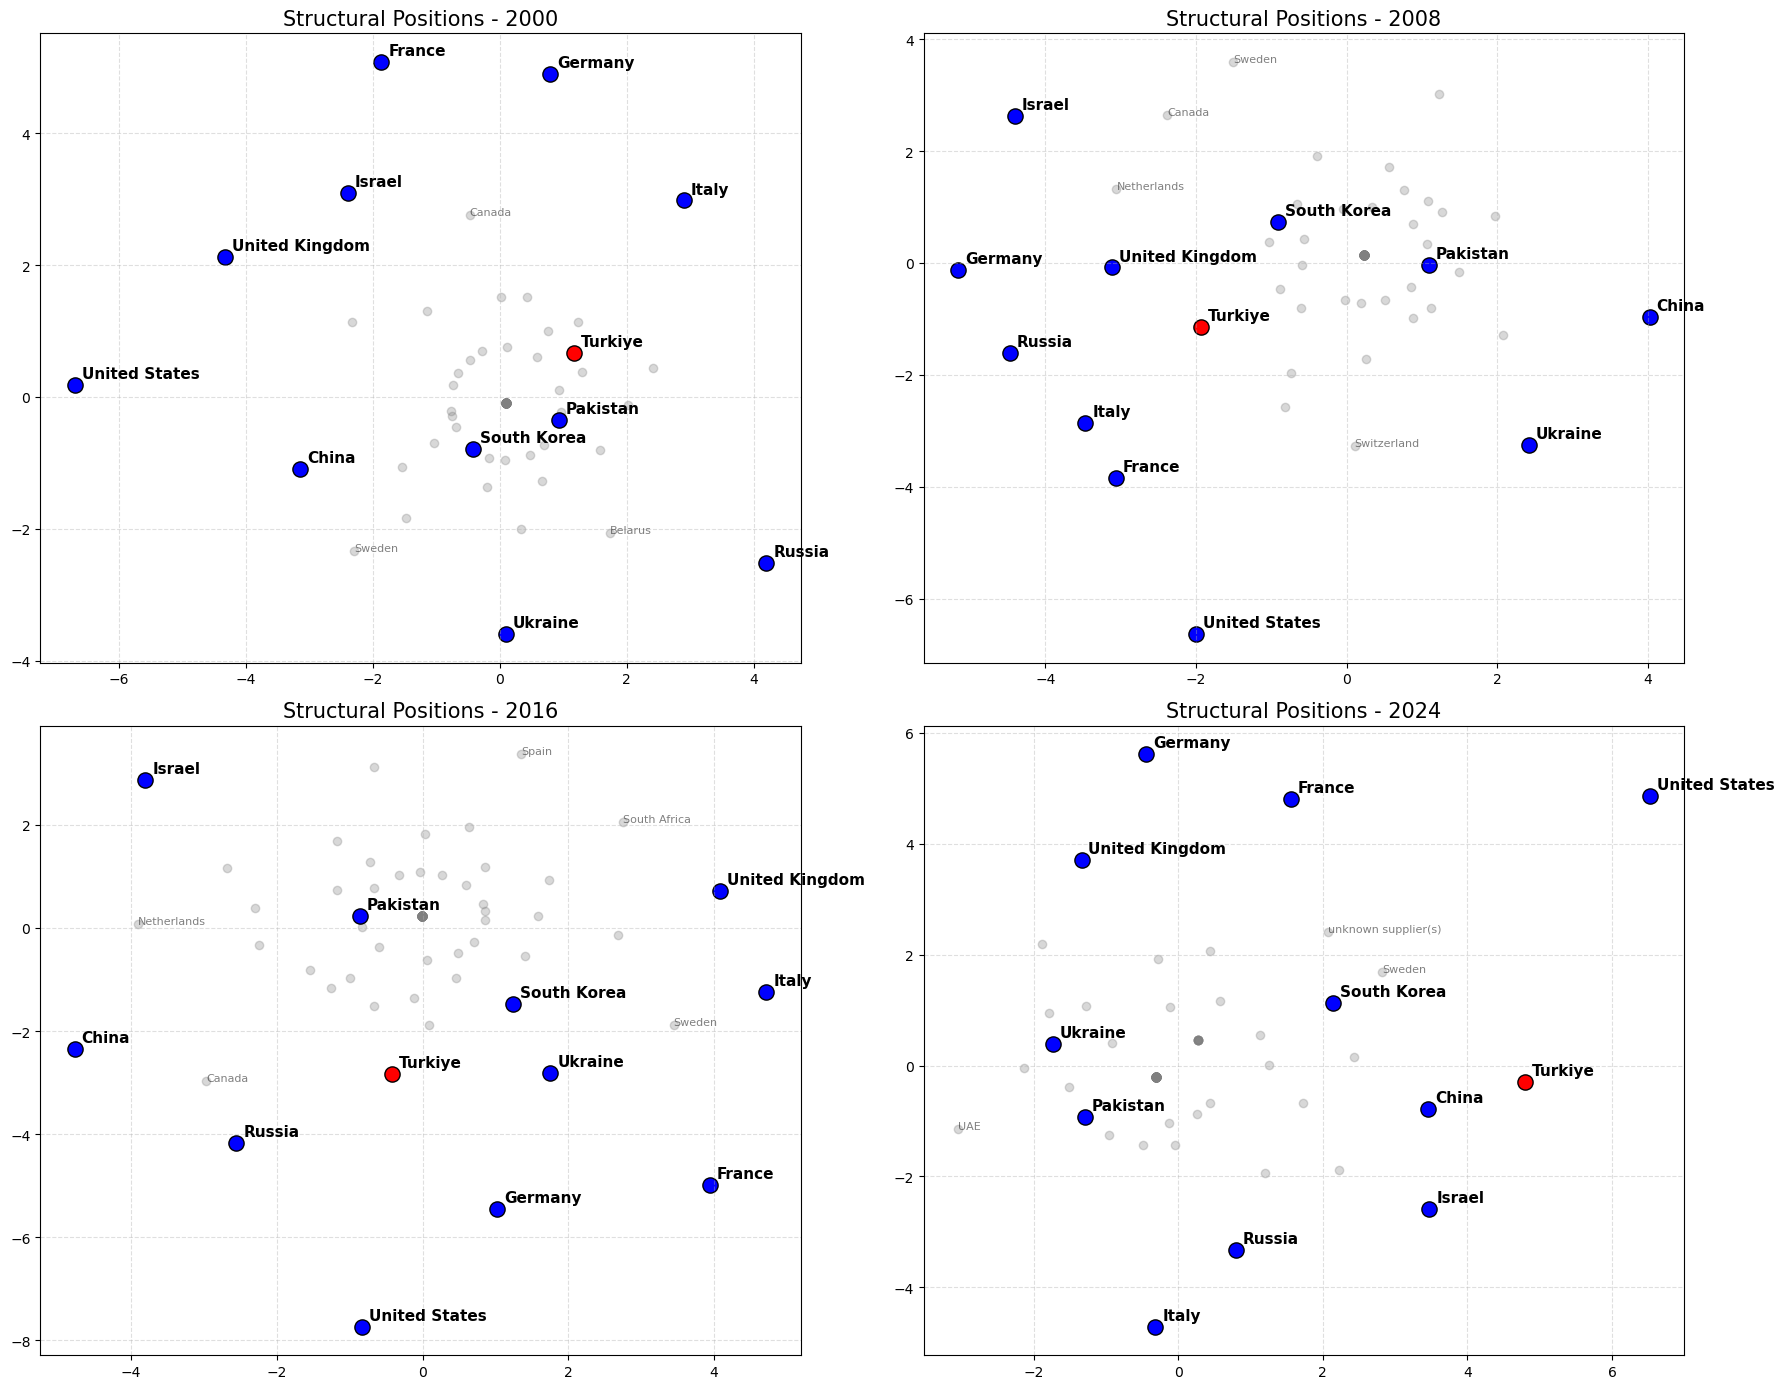

In [33]:
#2. Turkiye Export Analysis (Outdegree)
target_country = 'Turkiye'
years_of_interest = [2000, 2024]
export_results = []

for year in years_of_interest:
    exports = df[(df['Supplier'] == target_country) & (df['Delivery year'] == year)]
    destinations = exports['Recipient'].unique()
    export_results.append({
        'Year': year,
        'Destination_Count': len(destinations),
        'Destinations': ", ".join(sorted(destinations))
    })

export_df = pd.DataFrame(export_results)
print("--- Turkiye Export Evolution ---")
print(export_df.to_string(index=False))

# 2. Structural Position Analysis (MDS) for 2000, 2008, 2016, 2024
target_years = [2000, 2008, 2016, 2024]
highlights = ['United States', "United Kingdom", "Italy", 'Russia', 'China', 'Germany', 'France', 'Turkiye', 'Israel', 'South Korea', 'Pakistan', 'Ukraine']

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

for idx, year in enumerate(target_years):
    year_data = df[df['Delivery year'] == year].copy()
    year_data['Link'] = 1
    
    # Pivot for Supplier profile similarity
    matrix = year_data.pivot_table(index='Supplier', columns='Recipient', values='Link', aggfunc='max').fillna(0)
    
    # Square the matrix for consistent MDS comparison
    all_actors = sorted(list(set(matrix.index) | set(matrix.columns)))
    full_matrix = matrix.reindex(index=all_actors, columns=all_actors, fill_value=0)
    np.fill_diagonal(full_matrix.values, 0)
    
    # Compute Distance
    dist_matrix = euclidean_distances(full_matrix)
    
    # MDS
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42, normalized_stress='auto')
    coords = mds.fit_transform(dist_matrix)
    
    ax = axes[idx]
    ax.scatter(coords[:, 0], coords[:, 1], alpha=0.3, c='gray')
    
    suppliers = full_matrix.index.tolist()
    for i, country in enumerate(suppliers):
        if country in highlights:
            color = 'red' if country == 'Turkiye' else 'blue'
            ax.scatter(coords[i, 0], coords[i, 1], c=color, s=120, edgecolors='black')
            ax.annotate(country, (coords[i, 0], coords[i, 1]), fontsize=11, fontweight='bold', xytext=(5,5), textcoords='offset points')
        elif (coords[i,0]**2 + coords[i,1]**2) > np.percentile(coords[:,0]**2 + coords[:,1]**2, 90):
            ax.annotate(country, (coords[i, 0], coords[i, 1]), fontsize=8, alpha=0.5)

    ax.set_title(f"Structural Positions - {year}", fontsize=15)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig('mds_4_panel_analysis.png')